In [1]:
import numpy as np
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
from scipy.stats import spearmanr

In [3]:
data = load_breast_cancer()


In [13]:
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [11]:
corr = df.corr(method='pearson').abs()


In [12]:
sorter = corr['target'].sort_values(ascending=False)
sorter.head(11)

target                  1.000000
worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
worst area              0.733825
mean radius             0.730029
mean area               0.708984
mean concavity          0.696360
worst concavity         0.659610
Name: target, dtype: float64

In [19]:
correlated = df.drop(['texture error','smoothness error','compactness error','concavity error','symmetry error','fractal dimension error','mean smoothness','mean symmetry','mean fractal dimension','worst fractal dimension','concave points error','perimeter error','area error','radius error','mean texture','mean compactness','worst texture','worst smoothness','worst compactness','worst symmetry'],axis=1)

In [20]:
correlated

,mean radius,mean perimeter,mean area,mean concavity,mean concave points,worst radius,worst perimeter,worst area,worst concavity,worst concave points,target
0,17.99,122.80,1001.0,0.30010,0.14710,25.380,184.60,2019.0,0.7119,0.2654,0
1,20.57,132.90,1326.0,0.08690,0.07017,24.990,158.80,1956.0,0.2416,0.1860,0
2,19.69,130.00,1203.0,0.19740,0.12790,23.570,152.50,1709.0,0.4504,0.2430,0
3,11.42,77.58,386.1,0.24140,0.10520,14.910,98.87,567.7,0.6869,0.2575,0
4,20.29,135.10,1297.0,0.19800,0.10430,22.540,152.20,1575.0,0.4000,0.1625,0
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.24390,0.13890,25.450,166.10,2027.0,0.4107,0.2216,0
565,20.13,131.20,1261.0,0.14400,0.09791,23.690,155.00,1731.0,0.3215,0.1628,0
566,16.60,108.30,858.1,0.09251,0.05302,18.980,126.70,1124.0,0.3403,0.1418,0
567,20.60,140.10,1265.0,0.35140,0.15200,25.740,184.60,1821.0,0.9387,0.2650,0


In [22]:
top_5 = correlated.drop(['worst concavity','mean concavity','mean area','mean radius','worst area','target'],axis=1)
top_5

,mean perimeter,mean concave points,worst radius,worst perimeter,worst concave points
0,122.80,0.14710,25.380,184.60,0.2654
1,132.90,0.07017,24.990,158.80,0.1860
2,130.00,0.12790,23.570,152.50,0.2430
3,77.58,0.10520,14.910,98.87,0.2575
4,135.10,0.10430,22.540,152.20,0.1625
...,...,...,...,...,...
564,142.00,0.13890,25.450,166.10,0.2216
565,131.20,0.09791,23.690,155.00,0.1628
566,108.30,0.05302,18.980,126.70,0.1418
567,140.10,0.15200,25.740,184.60,0.2650


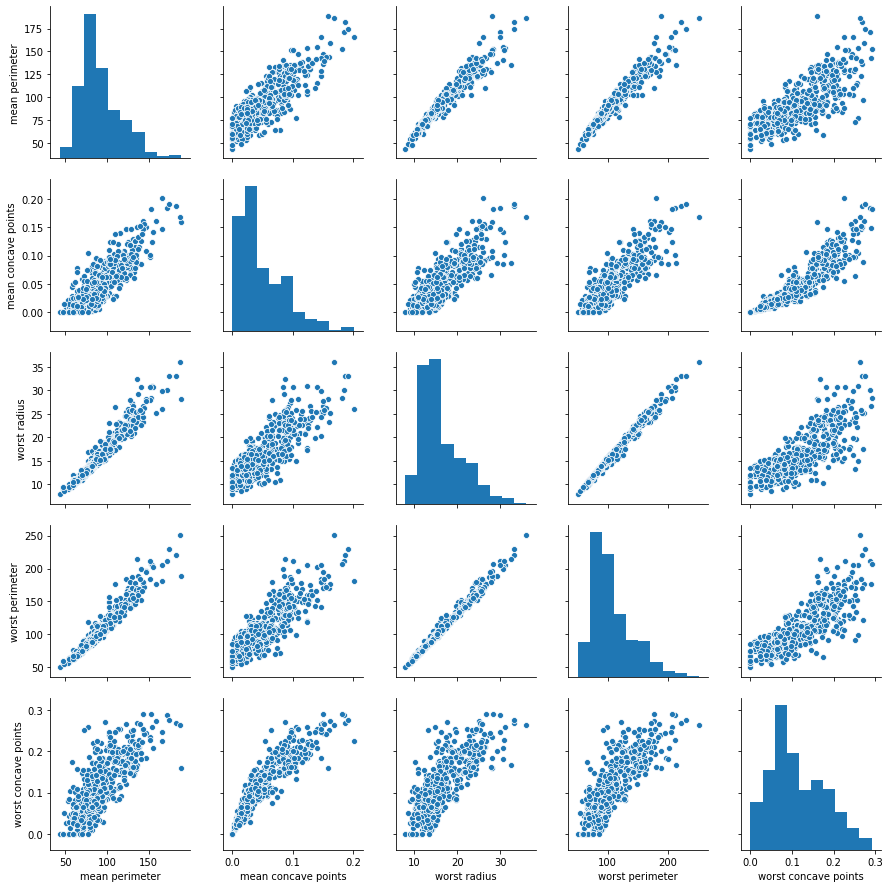

In [23]:
sns.pairplot(top_5)

In [24]:
less_than_mean = top_5.copy()

In [25]:
less_than_mean.replace(less_than_mean[less_than_mean<less_than_mean.mean()] ,np.nan)


,mean perimeter,mean concave points,worst radius,worst perimeter,worst concave points
0,122.8,0.14710,25.38,184.6,0.2654
1,132.9,0.07017,24.99,158.8,0.1860
2,130.0,0.12790,23.57,152.5,0.2430
3,NaN,0.10520,NaN,NaN,0.2575
4,135.1,0.10430,22.54,152.2,0.1625
...,...,...,...,...,...
564,142.0,0.13890,25.45,166.1,0.2216
565,131.2,0.09791,23.69,155.0,0.1628
566,108.3,0.05302,18.98,126.7,0.1418
567,140.1,0.15200,25.74,184.6,0.2650
